In [1]:
import numpy as np
import pandas as pd
import os
#reading the train data
train = pd.read_csv('train.csv')
train.head() 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [2]:
train.shape

(31962, 3)

In [3]:
#reading the test data
test = pd.read_csv('test.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
test.shape

(17197, 2)

# Data Exploration

<AxesSubplot:xlabel='label', ylabel='count'>

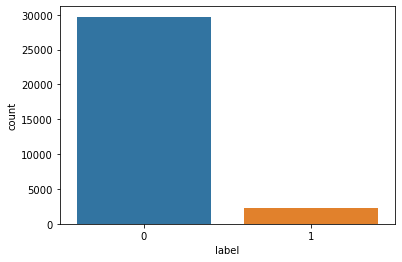

In [5]:
# These plots clearly shows that its a complete unbalanced data.
import seaborn as sns
sns.countplot(x=train['label'] ,data=train)

<AxesSubplot:ylabel='Frequency'>

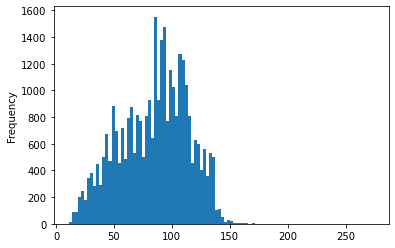

In [6]:
train['lengths'] = train['tweet'].apply(len)
#distribution of tweets
train['lengths'].plot(bins=100, kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

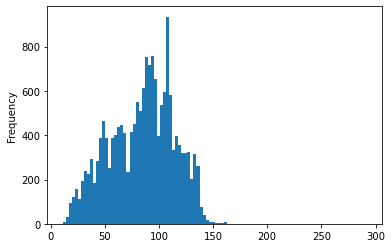

In [7]:
test['lengths'] = test['tweet'].apply(len)
#distribution of tweets
test['lengths'].plot(bins=100, kind = 'hist')

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='label', ylabel='id'>,
        <AxesSubplot:xlabel='lengths', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='label'>,
        <AxesSubplot:xlabel='label', ylabel='label'>,
        <AxesSubplot:xlabel='lengths', ylabel='label'>],
       [<AxesSubplot:xlabel='id', ylabel='lengths'>,
        <AxesSubplot:xlabel='label', ylabel='lengths'>,
        <AxesSubplot:xlabel='lengths', ylabel='lengths'>]], dtype=object)

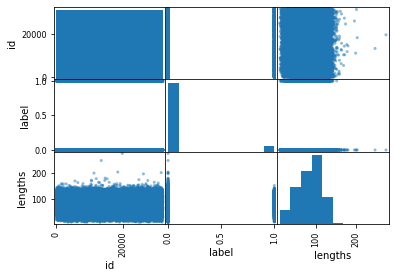

In [8]:
#Correlation matrix
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(train)

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='lengths', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='lengths'>,
        <AxesSubplot:xlabel='lengths', ylabel='lengths'>]], dtype=object)

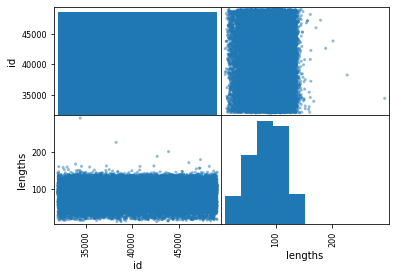

In [9]:
#Correlation matrix
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(test)

In [10]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS.add('amp')

positive_words = ' '.join(train[train.label == 0].tweet.values)
negative_words = ' '.join(train[train.label == 1].tweet.values)

In [11]:
# Now separting positive and negative tweets
positive = train[train['label']==0]
positive

,id,label,tweet,lengths
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [12]:
# Now separting positive and negative tweets
negative = train[train['label']==1]
negative

,id,label,tweet,lengths
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


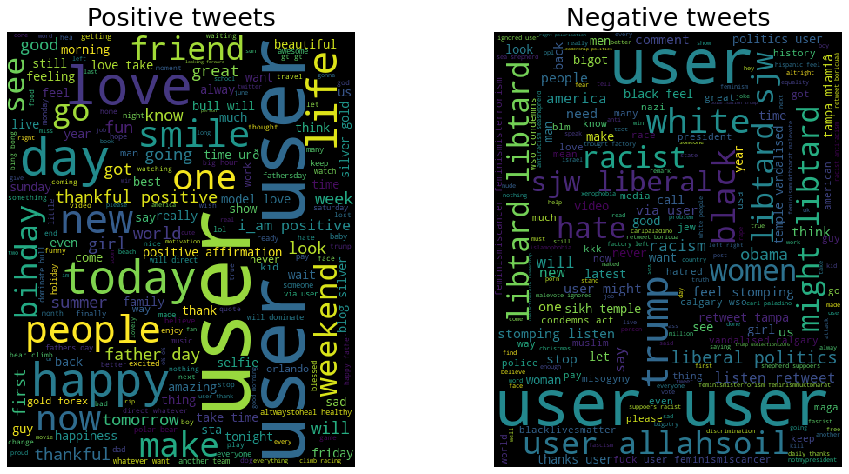

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=500, background_color='black', stopwords=stopwords).generate(positive_words)
plt.subplot(121)
plt.imshow(cloud1, interpolation="nearest")
plt.axis("off")
plt.title('Positive tweets', size=25)

cloud2 = WordCloud(width=400, height=500, background_color='black', stopwords=stopwords).generate(negative_words)
plt.subplot(122)
plt.imshow(cloud2, interpolation="nearest")
plt.axis("off")
plt.title('Negative tweets', size=25)
plt.show()

In [14]:
conda install -c conda-forge textblob

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

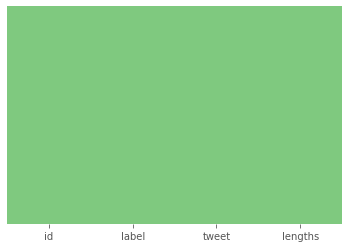

In [15]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'Accent')

# Analysing the Data

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [17]:
#Counting the number of words in each tweet
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
train_wordcount = train.sort_values(by='word_count')
train_wordcount[['tweet','word_count']].tail()

,tweet,word_count
30429,@user **** big announcement tonight at 8pm***...,38
23181,#thursdaythoughts from @user ...,39
7123,@user good morning!!!!ðð. ...,40
18895,â¢ h a p p y m o n d a y â¢ ð - f e l...,42
1447,the greatest gift i ever had came from...,43


In [18]:
#Counting the characters in each tweet
train['char_count'] = train['tweet'].str.len()
train_charcount = train.sort_values(by='char_count')
train_charcount[['tweet', 'char_count']].tail()

,tweet,char_count
11283,@user st lucia â¢ socafrenzy ðð¿ðð...,199
31485,&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&g...,201
18433,@user rotterdam â¢ socafrenzy â¢ ðð¿ð...,203
13459,awesom beautiful wonderfulððððð...,247
19770,@user lmfao pathetic #soit #growup #funny #...,274


In [19]:
#Counting the number of hashtags in each tweet
train['hashtags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train_hashtags = train.sort_values(by='hashtags')
train_hashtags[['tweet', 'hashtags']].tail()

,tweet,hashtags
20087,retweet it sweetie ðâ»ï¸ #bbw #curvy #bbw...,14
17579,donnabrill - na: #slut #naughty #wet #hot #hor...,14
17009,@user #spring #break #beach i #swim #gopro #s...,15
13117,#boring saturday #summer #rain #candles #all_s...,16
24444,boy george #bihday #culture #club #music #a ...,16


In [20]:
#Counting the number of mentions in each tweet
train['mentions'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train_mentions = train.sort_values(by='mentions')
train_mentions[['tweet', 'mentions']].tail()

,tweet,mentions
21441,@user @user @user @user @user @user @user @use...,9
14058,@user sunday @user @user @user @user @user ...,10
23161,@user @user @user @user @user @user @user @use...,10
5235,@user @user @user @user @user @user @user @us...,10
4799,@user @user @user @user @user @user @user @us...,11


In [21]:
#Counting the numbers in each tweet
train['number_count'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_numcount = train.sort_values(by='number_count')
train_numcount[['tweet', 'number_count']].tail()

,tweet,number_count
6336,makes me sick that 4 ovr 25 yrs idolized georg...,4
25397,@user in a room of health &amp; edn professi...,4
20839,bosses of @user 4 @user s/b fired! #deadliestp...,4
31610,"@user 77 days, 16 captains' practices, 1 new ...",4
371,anas + nimra + farishta + mawia + khushal 960...,6


In [22]:
stop_words = stopwords.words('english')

#displaying the count of stopwords
train['stopwords'] = train['tweet'].apply(lambda x: len([i for i in x.split() if i in stop_words]))
train_stopwords = train.sort_values(by='stopwords')
train_stopwords[['tweet', 'stopwords']].tail()

,tweet,stopwords
16543,today it's your 20 old bihday i wish you a ...,18
12663,#you were the first person i wanted to run to ...,18
5797,one exam :d even though i woke up at 5 to get ...,19
28637,do i have that much of an impact on your life ...,20
7509,to people who know you but are not friends to ...,22


In [23]:
train['sentiment'] = train['tweet'][:20].apply(lambda x: TextBlob(x).sentiment[0])
train[['tweet','sentiment']].head(10)

,tweet,sentiment
0,@user when a father is dysfunctional and is s...,-0.500000
1,@user @user thanks for #lyft credit i can't us...,0.200000
2,bihday your majesty,0.000000
3,#model i love u take with u all the time in ...,0.976562
4,factsguide: society now #motivation,0.000000
5,[2/2] huge fan fare and big talking before the...,0.200000
6,@user camping tomorrow @user @user @user @use...,0.000000
7,the next school year is the year for exams.ð...,-0.400000
8,we won!!! love the land!!! #allin #cavs #champ...,0.976562
9,@user @user welcome here ! i'm it's so #gr...,1.000000


In [24]:
#Bag of words
bagofwords = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bagofwords = bagofwords.fit_transform(train['tweet'])
train_bagofwords

<31962x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 329848 stored elements in Compressed Sparse Row format>

# Data Preprocessing

In [25]:
import nltk
import string
from nltk.corpus import stopwords

In [26]:
#Removing Punctuation
train['tweet'] = train['tweet'].str.replace('[^\w\s]', '')
train['tweet'].head()

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object

In [27]:
#Removing Stopwords
stop_words = stopwords.words('english')

train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [28]:
#Instantiate Tokenizer
train['tweet'][:10].apply(lambda x: TextBlob(x).words)

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3      [model, love, u, take, u, time, urð, ðððð, ððð]
4                    [factsguide, society, motivation]
5    [22, huge, fan, fare, big, talking, leave, cha...
6    [user, camping, tomorrow, user, user, user, us...
7    [next, school, year, year, examsð, cant, think...
8    [love, land, allin, cavs, champions, cleveland...
9                       [user, user, welcome, im, gr8]
Name: tweet, dtype: object

In [29]:
#Stemming
st = PorterStemmer()
train['tweet'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit cant use caus dont...
2                                       bihday majesti
3                model love u take u time urð ðððð ððð
4                              factsguid societi motiv
5    22 huge fan fare big talk leav chao pay disput...
6    user camp tomorrow user user user user user us...
7    next school year year examsð cant think ð scho...
8    love land allin cav champion cleveland clevela...
9                              user user welcom im gr8
Name: tweet, dtype: object

In [30]:
#Lemmatizing
train['tweet'][:10].apply(lambda x: " ".join(Word(word) for word in x.split()))

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
6    user camping tomorrow user user user user user...
7    next school year year examsð cant think ð scho...
8    love land allin cavs champions cleveland cleve...
9                             user user welcome im gr8
Name: tweet, dtype: object

In [31]:
#Grouping top 40 common words and removing them

common_top40 = pd.Series(' '.join(train['tweet']).split()).value_counts()[:40]
print(common_top40)

#printing list of top 40 common words
common = list(common_top40.index)

#Removing top 40 common words
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
train['tweet'].head(10)

user        17473
love         2647
ð            2511
day          2199
â            1775
happy        1663
amp          1582
im           1139
u            1136
time         1110
life         1086
like         1042
today         991
new           983
positive      928
thankful      919
get           917
people        852
good          840
bihday        825
cant          802
ððð           796
one           781
ðð            763
see           756
dont          718
fathers       706
smile         677
go            648
want          644
take          621
work          606
healthy       596
weekend       577
fun           561
make          546
summer        532
got           527
best          511
us            509
dtype: int64


0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit use cause offer wheelchair ...
2                                              majesty
3                                       model urð ðððð
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
6                              camping tomorrow dannyâ
7    next school year year examsð think school exam...
8    land allin cavs champions cleveland clevelandc...
9                                          welcome gr8
Name: tweet, dtype: object

In [32]:
train['sentiment1'] = train['tweet'][:20].apply(lambda x: TextBlob(x).sentiment[0])
train[['tweet','sentiment1']].head(10)

,tweet,sentiment1
0,father dysfunctional selfish drags kids dysfun...,-0.5
1,thanks lyft credit use cause offer wheelchair ...,0.2
2,majesty,0.0
3,model urð ðððð,0.0
4,factsguide society motivation,0.0
5,22 huge fan fare big talking leave chaos pay d...,0.2
6,camping tomorrow dannyâ,0.0
7,next school year year examsð think school exam...,-0.4
8,land allin cavs champions cleveland clevelandc...,0.0
9,welcome gr8,0.8


In [33]:
#creating sparse matrix  to pass to vectorizer
len(train)
corpus = []
for i in range(0,31962):
    corpus.append(train['tweet'][i])
#corpus
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [34]:
#Creating dense matrix
X = cv.transform(corpus).toarray()
y = train.iloc[:,1].values

# Naive Bayes Model

In [35]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=5)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
expected = y_test
accuracy_score = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

93.23%


In [37]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7433
           1       0.52      0.50      0.51       558

    accuracy                           0.93      7991
   macro avg       0.74      0.73      0.74      7991
weighted avg       0.93      0.93      0.93      7991

[[7172  261]
 [ 280  278]]


<AxesSubplot:>

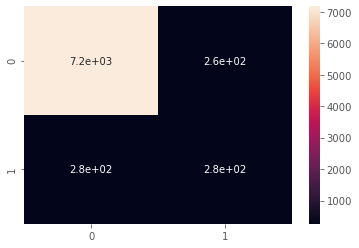

In [38]:
# Confusion matrix
cm = confusion_matrix(expected, predicted)
sns.heatmap(cm, annot= True)

In [39]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X_train, y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test), y_test)
print(str('{:04.2f}'.format(cnb_accuracy_score*100)+'%'))

86.85%


In [40]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
gnb_accuracy_score = metrics.accuracy_score(GNB.predict(X_test), y_test)
print(str('{:04.2f}'.format(gnb_accuracy_score*100)+'%'))

86.06%


In [41]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), y_test)
print(str('{:04.2f}'.format(bnb_accuracy_score*100)+'%'))

93.28%


# TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=5)

In [44]:
MNB.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(MNB.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

94.91%


In [45]:
CNB.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(CNB.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

84.91%


In [46]:
GNB.fit(X1_train.todense(), y1_train)
accuracy_score = metrics.accuracy_score(GNB.predict(X1_test.todense()), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

74.03%


In [47]:
BNB.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(BNB.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

94.64%


# Linear Support Vector Classifier

In [48]:
LSVC = LinearSVC()
LSVC.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(LSVC.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

95.31%


In [49]:
LSVC.fit(X_train, y_train)
accuracy_score = metrics.accuracy_score(LSVC.predict(X_test), y_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

95.77%


# Stochastic Gradient Descent Classifier

In [50]:
SGD = SGDClassifier()
SGD.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(SGD.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

95.21%


In [51]:
SGD.fit(X_train, y_train)
accuracy_score = metrics.accuracy_score(SGD.predict(X_test), y_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

95.95%


In [67]:
test_data = cv.transform(test['tweet']).toarray()

In [68]:
answer = SGD.predict(test_data)

In [70]:
test['Predicted Labels'] = answer

In [71]:
test.head()

,id,tweet,lengths,Predicted Labels
0,31963,#studiolife #aislife #requires #passion #dedic...,90,0
1,31964,@user #white #supremacists want everyone to s...,101,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,71,0
3,31966,is the hp and the cursed child book up for res...,142,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93,0


<AxesSubplot:xlabel='Predicted Labels', ylabel='count'>

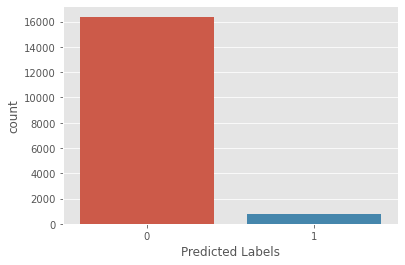

In [73]:
sns.countplot(x=test['Predicted Labels'] ,data=test)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
logreg.fit(X1_train, y1_train)
accuracy_score = metrics.accuracy_score(logreg.predict(X1_test), y1_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

[LibLinear]95.39%


In [65]:
logreg.fit(X_train, y_train)
accuracy_score = metrics.accuracy_score(logreg.predict(X_test), y_test)
print(str('{:04.2f}'.format(accuracy_score*100)+'%'))

[LibLinear]95.90%
